In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
link = "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv"
diabetes_df = pd.read_csv(urlretrieve(link, 'diabetes_clean.csv')[0])
X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
test_accuracy={}
train_accuracy = {}
neighbors = np.arange(1,40)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    test_accuracy[neighbor] = knn.score(X_test, y_test)
    train_accuracy[neighbor] = knn.score(X_train, y_train)\

test_accuracy_list = [test_accuracy[neighbor] for neighbor in neighbors]
train_accuracy_list = [train_accuracy[neighbor] for neighbor in neighbors]


In [17]:
print(len(neighbors))
print(len(test_accuracy_list))
print((train_accuracy_list))


39
39
39


In [19]:
print(type(test_accuracy))  # Should be dict
print(type(train_accuracy))  # Should be dict


<class 'dict'>
<class 'dict'>


ValueError: x and y must have same first dimension, but have shapes (39,) and (1,)

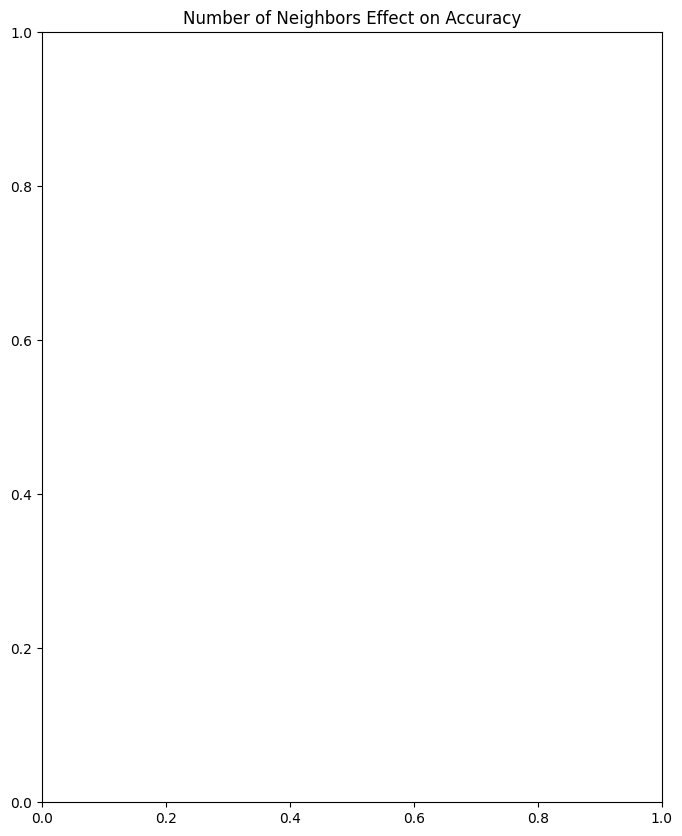

In [21]:

plt.figure(figsize=(8, 10))
plt.title('Number of Neighbors Effect on Accuracy')

# Plotting the data
plt.plot(neighbors, test_accuracy.values, label='Test Accuracy', color='blue')
plt.plot(neighbors, train_accuracy.values, label='Train Accuracy', color='red')

# Adding labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')  # Corrected spelling

plt.legend()
plt.show()


In [33]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



In [34]:
y_pred_prob = knn.predict_proba(X_test)[:,1]


In [35]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7300496688741722
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



<function matplotlib.pyplot.show(close=None, block=None)>

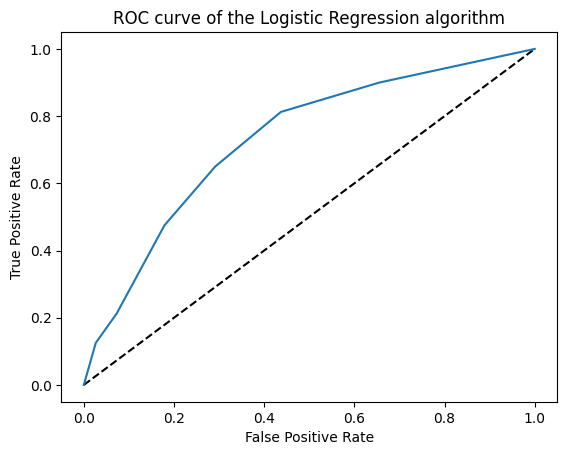

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of the Logistic Regression algorithm')
plt.show


Logistic Regression Exercise

In [31]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
link = "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv"
diabetes_df = pd.read_csv(urlretrieve(link, 'diabetes_clean.csv')[0])
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
log_reg = LogisticRegression(max_iter= 25)
log_reg.fit(X_train, y_train)

c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=25)

In [30]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
y_pred_prob

array([0.47763153, 0.2443004 , 0.3632741 , 0.34504323, 0.36619357,
       0.41303288, 0.36031667, 0.84927444, 0.45324742, 0.50026269,
       0.42036326, 0.39684897, 0.56915736, 0.33419366, 0.31629416,
       0.48182486, 0.23390954, 0.29358463, 0.92625256, 0.40332922,
       0.37893652, 0.20501869, 0.39802675, 0.29579511, 0.45200341,
       0.44701272, 0.40557275, 0.26027877, 0.1913913 , 0.28924377,
       0.31836895, 0.49266406, 0.48984718, 0.8903853 , 0.25195254,
       0.46428693, 0.43549645, 0.17967915, 0.48369329, 0.84868542,
       0.36301873, 0.59282453, 0.36582282, 0.48318934, 0.20231529,
       0.41235626, 0.38158346, 0.27340116, 0.47612928, 0.49209249,
       0.30382188, 0.41119154, 0.53179288, 0.38308778, 0.4392484 ,
       0.23995159, 0.5839732 , 0.76616405, 0.32231138, 0.60517439,
       0.44268584, 0.31871797, 0.4191057 , 0.58390858, 0.16996529,
       0.20747697, 0.29668871, 0.21428005, 0.25235591, 0.55343939,
       0.57839678, 0.18985844, 0.46952143, 0.16699645, 0.40302

<function matplotlib.pyplot.show(close=None, block=None)>

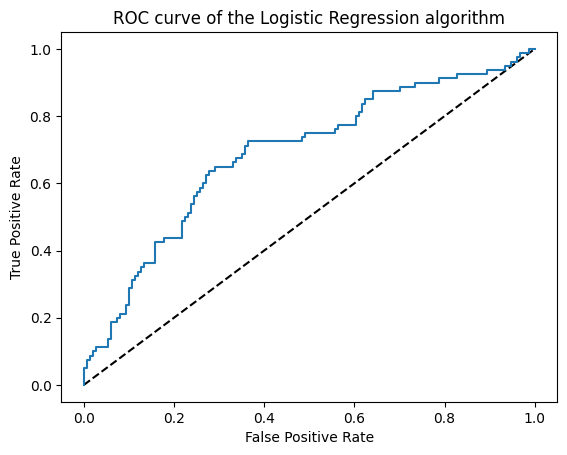

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of the Logistic Regression algorithm')
plt.show


GridSearchCV

In [43]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
link = "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv"
diabetes_df = pd.read_csv(urlretrieve(link, 'diabetes_clean.csv')[0])
y = diabetes_df["diabetes"].values
X = diabetes_df.drop("diabetes", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
logreg = LogisticRegression(solver='liblinear')

In [44]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set up the parameter grid
param_grid = {"C": np.linspace(0.0001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(logreg, param_grid, cv= kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'C': 0.7368684210526316}
Tuned lasso score: 0.7589630814340931
